Prise de données pour les différentes expériences.

D'abord, inclusion des modules nécessaires pour l'analyse de données.

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Ouverture du fichier Excel avec les données

In [109]:
data = pd.read_excel("../TPOP/Tpop Polarisation.xlsx")

Lecture des données de la première expérience qui porte sur l'angle de Brewster.

In [110]:
anglesBrewster = data.iloc[5:40 ,6]
laserHeNeParallele = data.iloc[5:40, 7]
laserHeNePerpendiculaire = data.iloc[5:40, 11]

Ensuite, pour l'intensité à la sortie du polariseur.

In [111]:
anglesPolariseur = data.iloc[5:42,26].values
intensitePolariseur = data.iloc[5:42,27].values

Ensuite, pour l'intensité à la sortie du Glan-Thompson.

In [112]:
anglesGlanThompson = data.iloc[5:24, 22].values
intensiteGlanThompson = data.iloc[5:24, 23].values

Finalement pour l'expérience avec la lame quart d'onde.

Pandas lis les nombres à virgule dans le fichier excel comme étant de type string et un string ne peut pas être converti en float si son indice de décimal est une virgule. Seulement possible si c'est un .

In [113]:
def ConvertArrayDataToFloat(array):
    newArray = []
    for i in array:
        if type(i) == str:
            newArray.append(i.replace(',', '.'))
        elif type(i) == int:
            newArray.append(float(i))
        elif type(i) == float:
            newArray.append(i)

    return np.array(newArray)

Les données sont maintenant toutes présentes, il suffit de les mettre en graphique. 

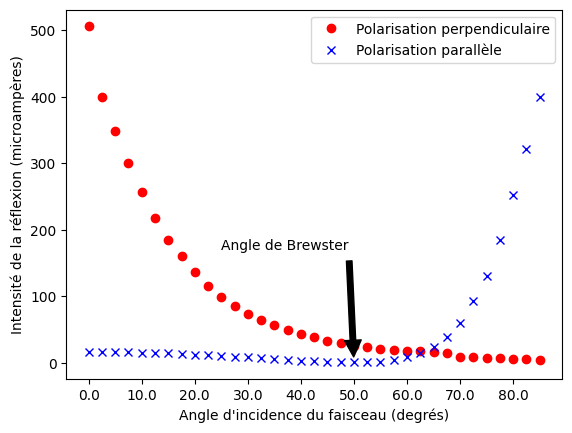

In [132]:
plt.plot(ConvertArrayDataToFloat(anglesBrewster), ConvertArrayDataToFloat(laserHeNePerpendiculaire), 'o', color='red', label="Polarisation perpendiculaire")
plt.plot(ConvertArrayDataToFloat(anglesBrewster), ConvertArrayDataToFloat(laserHeNeParallele), 'x', color='blue', label = "Polarisation parallèle")
plt.xticks(np.arange(0, 35, step=4))
plt.annotate("Angle de Brewster", xy = (ConvertArrayDataToFloat(anglesBrewster)[20], ConvertArrayDataToFloat(laserHeNeParallele)[20])
             , xytext = (10, 170), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("Angle d'incidence du faisceau (degrés)")
plt.ylabel("Intensité de la réflexion (microampères)")
plt.legend()
plt.show()

Ensuite, le même processus peut être fait pour l'expérience sur l'efficacité des appareils de polarisation comme le prisme de Glan ainsi que le polariseur.

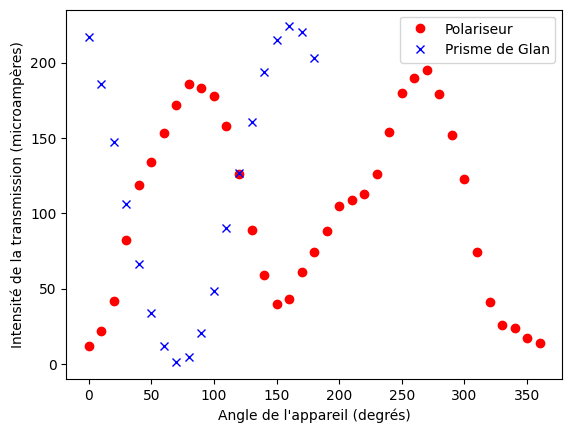

In [138]:
plt.plot(ConvertArrayDataToFloat(anglesPolariseur), ConvertArrayDataToFloat(intensitePolariseur), 'o', color='red', label="Polariseur")
plt.plot(ConvertArrayDataToFloat(anglesGlanThompson), ConvertArrayDataToFloat(intensiteGlanThompson), 'x', color='blue', label = "Prisme de Glan")
plt.xlabel("Angle de l'appareil (degrés)")
plt.ylabel("Intensité de la transmission (microampères)")
plt.legend()
plt.show()

Pour terminer, le graphique de l'expérience de transmission à travers le prisme de Glan avant et après l'ajout d'une lame quart d'onde. 
